In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt 
from qutip.qip.operations import cphase

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lorentzian(x, x0, gamma, A):
    """Calculate the Lorentzian function.
    
    Parameters:
    - x: The independent variable.
    - x0: The position of the peak.
    - gamma: The half-width at half-maximum (HWHM).
    - A: The peak height.
    """
    return A * gamma**2 / (np.pi * ((x - x0)**2 + gamma**2))

def plot_peaks(height1, height2, title):
    """Plot two Lorentzian peaks with given heights.
    
    Parameters:
    - height1: The height of the first peak.
    - height2: The height of the second peak.
    - title: Title of the plot
    """
    x = np.linspace(-10, 10, 400)  # Independent variable range
    gamma = 0.001  # Assume a fixed HWHM for simplicity
    x0_1, x0_2 = -2.5, 2.5  # Positions of the two peaks
    
    # Calculate the Lorentzian peaks
    y1 = lorentzian(x, x0_1, gamma, height1)
    y2 = lorentzian(x, x0_2, gamma, height2)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='Peak 1 (Height = {:.2f})'.format(height1), color = 'm')
    plt.plot(x, y2, label='Peak 2 (Height = {:.2f})'.format(height2), color = 'm')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def H_peak_simulator(rho):
    """" 
    Plots the expected Hydrogen peaks on an NMR spectrum with a state descrived by density matrix rho.

    Parameters:
    - rho: A 4x4 diagonal matrix
    """
    a, b, c, d = np.diag(rho)
    plot_peaks(a-c, b-d, 'Hydrogen Frequency Spectrum')

def C_peak_simulator(rho):
    """" 
    Plots the expected Carbon peaks on an NMR spectrum with a state descrived by density matrix rho.

    Parameters:
    - rho: A 4x4 diagonal matrix
    """
    a, b, c, d = np.diag(rho)
    plot_peaks(a-b, c-d, 'Carbon Frequency Spectrum')

# Creating p00, density matrix of the initial, thermal state of Chloroform in the NMR spectrometer
p00 = np.identity(4) + np.diag([5, 3, -3, -5]) 
p00 = Qobj(p00, dims = [[2,2], [2,2]])

## 1. Square Root of NOT Gate

In [3]:

V = Qobj([[1, -1j], [-1j, 1]]) /np.sqrt(2) # one qubit operations
V_H = tensor(V, qeye(2)) # total operator with V acting on H
p_v = V_H * p00 * V_H.dag()  

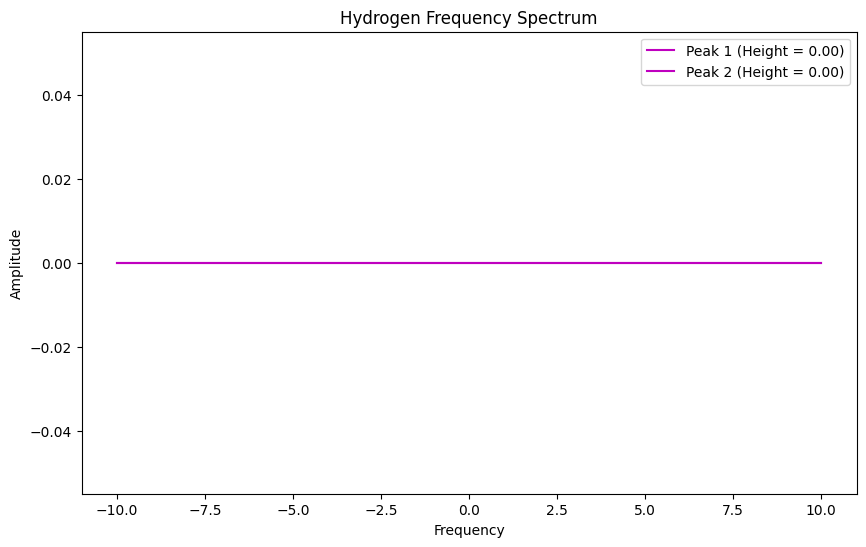

In [4]:
H_peak_simulator(np.real(p_v))

/Users/emmahughes/quantum/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/emmahughes/quantum/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


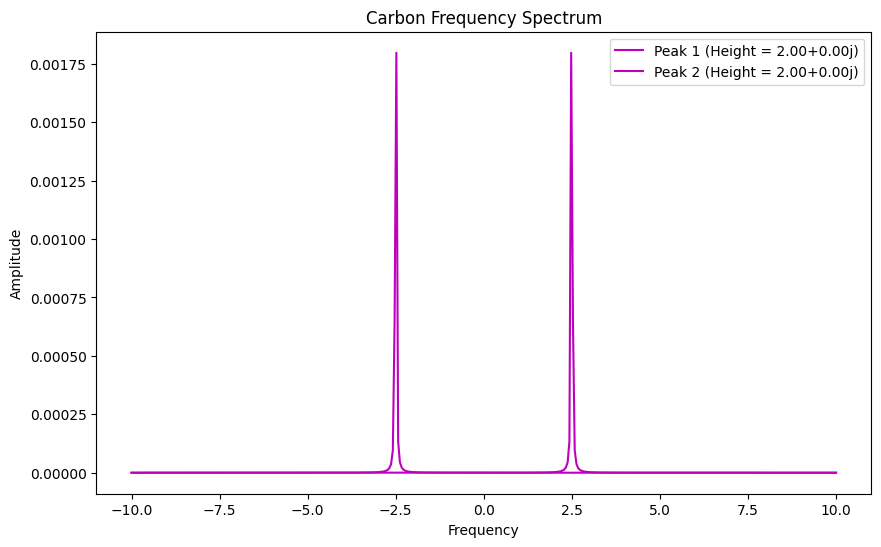

In [5]:
C_peak_simulator(p_v)

## Hadamard

In [6]:
H = Qobj([[-1j, -1j], [-1j, 1j]]) / np.sqrt(2) # exact hadamard
h = Qobj([[1, 1], [-1, 1]]) / np.sqrt(2) # pseudo hadamard

H_H = tensor(H, qeye(2)) # doing hadamard on C
h_C = tensor(qeye(2), h) # doing pseudo hadamard on C

p_H = H_H * p00 * H_H.dag() 
p_C = h_C * p00 * h_C.dag()

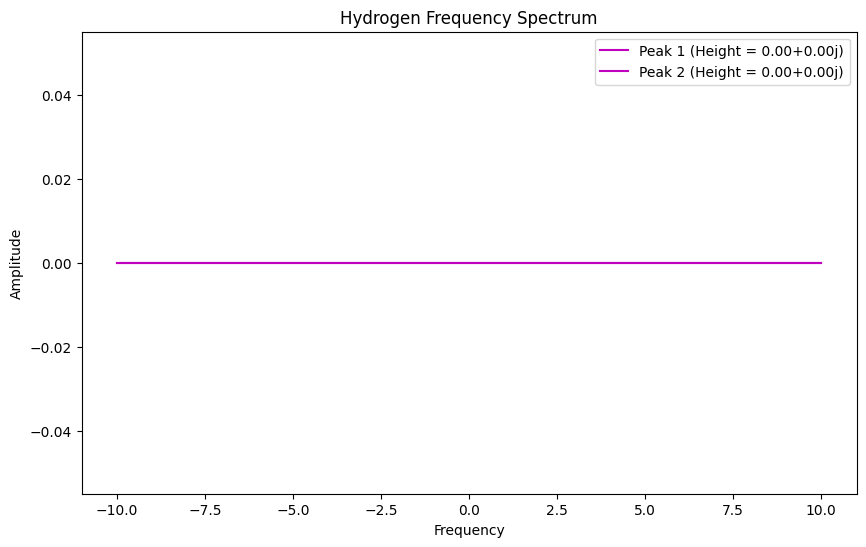

In [7]:
H_peak_simulator(p_H)

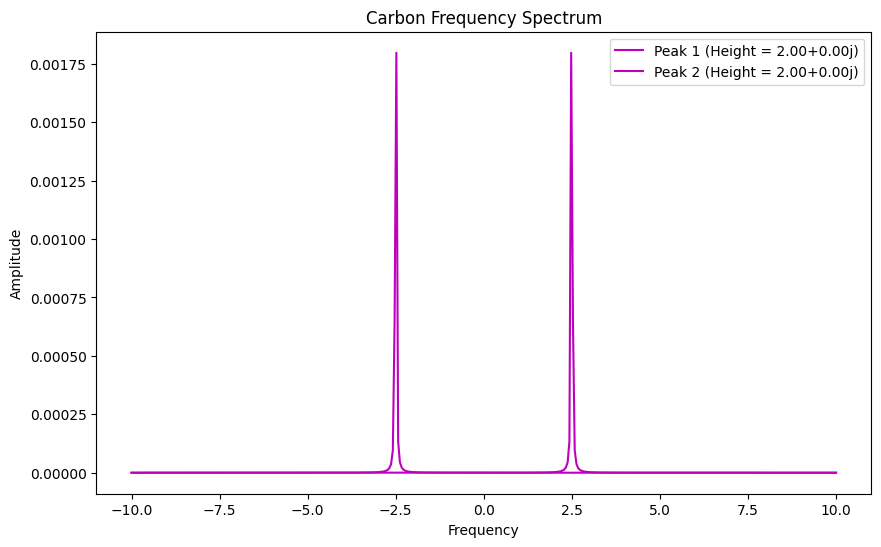

In [8]:
C_peak_simulator(p_H)

## Controlled Z CZ

In [11]:
CZ = cphase(np.pi)
p_CZ = CZ * p00 * CZ.dag()

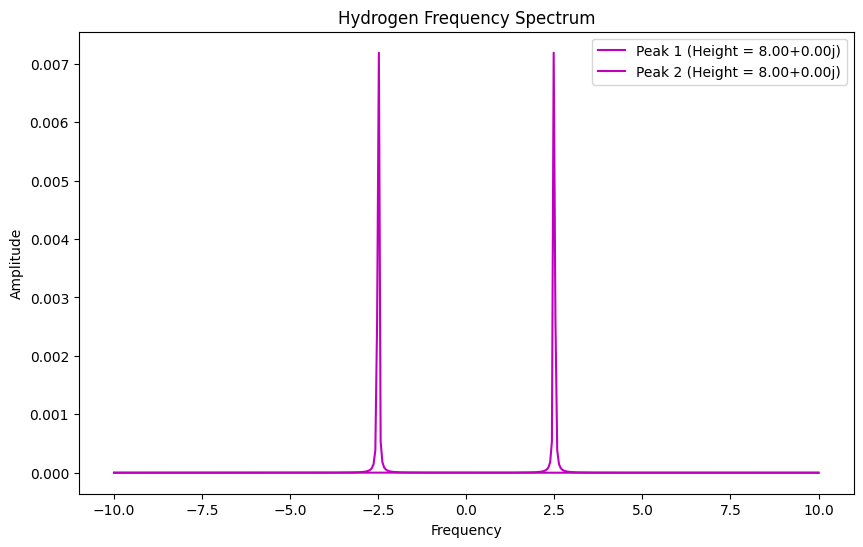

In [12]:
H_peak_simulator(p_CZ)

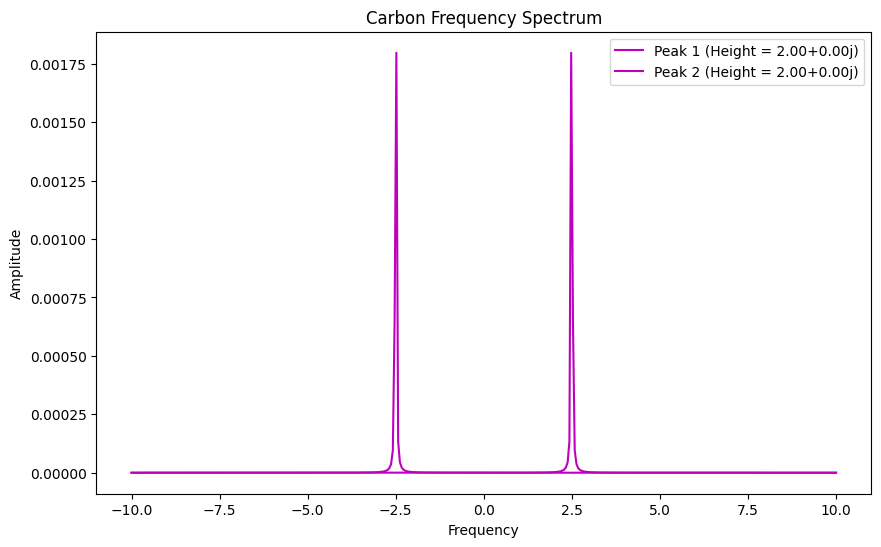

In [13]:
C_peak_simulator(p_CZ)

## Approx CX

In [14]:
CX = h_C * CZ * h_C # pseduo hadamard on C, CZ with ctrl H, target C, pseduo hadamard on C
p_CX = CX * p00 * CX.dag()

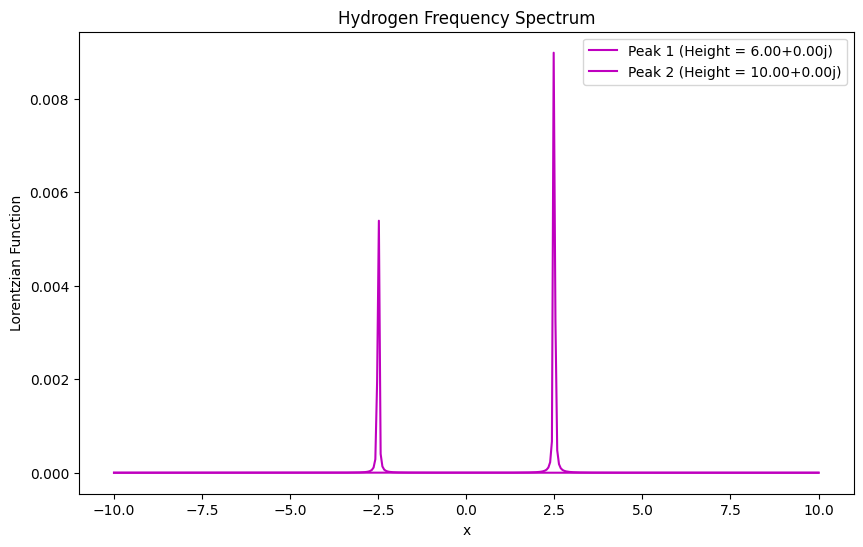

In [16]:
H_peak_simulator(p_CX)

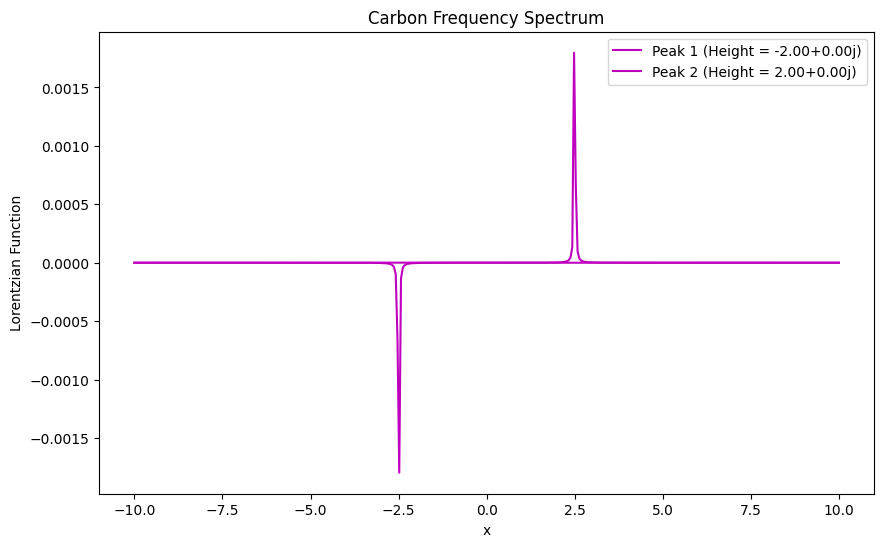

In [17]:
C_peak_simulator(p_CX)

## Exact CX

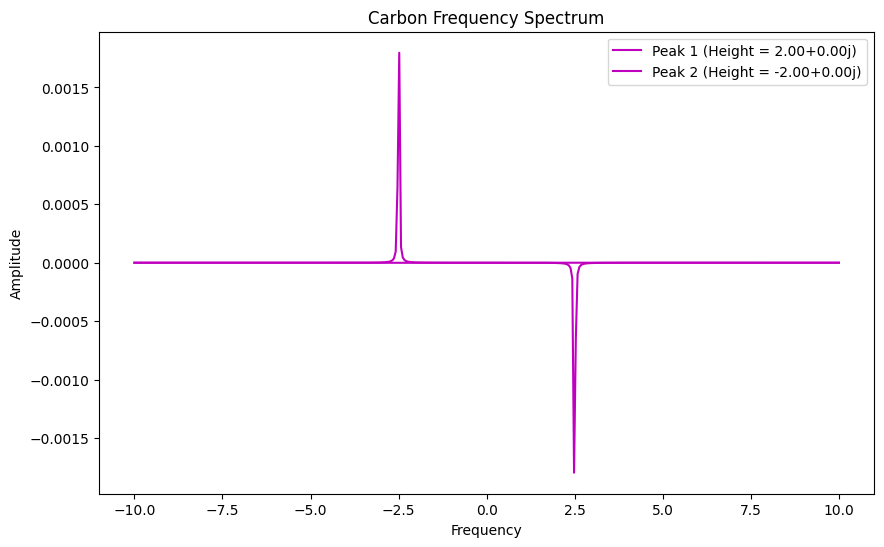

In [17]:
CX_exact = Qobj(np.array([[1,0,0,0], [0,1,0,0], [0,0,0,1],[0,0,1,0]]), dims = [[2,2], [2,2]])
p_C_exact = CX_exact * p00 * CX_exact.dag()
C_peak_simulator(p_C_exact)

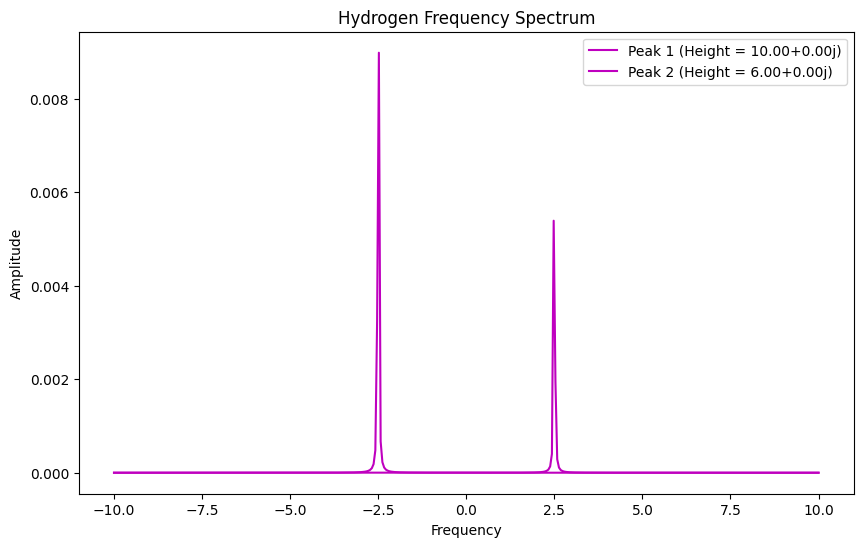

In [16]:
H_peak_simulator(p_C_exact)